# INTRO

There are two separate target columns to predict, each in dataset 1 and dataset 2.

This notebook is about dataset 1

# 1. GETTING READY

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from fast_ml.feature_selection import get_duplicate_features
from fast_ml.feature_selection import get_constant_features

In [2]:
#import dataset
df = pd.read_csv("../data/dataset_1.csv")

# 2. DATASET INFO

In [3]:
# first five rows
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [4]:
# shape
df.shape

(50000, 301)

In [5]:
# info
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 301 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    var_1    50000 non-null  int64  
 1    var_2    50000 non-null  int64  
 2    var_3    50000 non-null  float64
 3    var_4    50000 non-null  float64
 4    var_5    50000 non-null  float64
 5    var_6    50000 non-null  int64  
 6    var_7    50000 non-null  int64  
 7    var_8    50000 non-null  int64  
 8    var_9    50000 non-null  int64  
 9    var_10   50000 non-null  int64  
 10   var_11   50000 non-null  float64
 11   var_12   50000 non-null  float64
 12   var_13   50000 non-null  float64
 13   var_14   50000 non-null  int64  
 14   var_15   50000 non-null  int64  
 15   var_16   50000 non-null  float64
 16   var_17   50000 non-null  float64
 17   var_18   50000 non-null  float64
 18   var_19   50000 non-null  int64  
 19   var_20   50000 non-null  int64  
 20   var_21   50000 non-null  f

In [6]:
# description
df.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.00000,...,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,0.002220,0.000060,15.593002,3.149633,608.681764,4.000000e+03,0.000300,0.035040,0.000240,0.00018,...,0.085164,0.009900,0.0,0.127260,0.086880,0.0,0.003060,12.462960,5.683960e+03,0.039820
std,0.108145,0.007746,1280.571855,2.740114,10951.361737,6.324492e+05,0.029999,0.322884,0.026832,0.03000,...,1.148319,0.214016,0.0,0.607019,0.622398,0.0,0.078808,832.417622,4.736482e+04,0.195538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,2.850000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
75%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
max,9.000000,1.000000,207901.336500,35.280000,445500.000000,1.000000e+08,3.000000,6.000000,3.000000,6.00000,...,74.520000,12.000000,0.0,6.000000,33.000000,0.0,3.000000,134666.681100,2.857673e+06,1.000000


array([[<AxesSubplot:title={'center':'var_1'}>,
        <AxesSubplot:title={'center':'var_2'}>,
        <AxesSubplot:title={'center':'var_3'}>,
        <AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_5'}>,
        <AxesSubplot:title={'center':'var_6'}>,
        <AxesSubplot:title={'center':'var_7'}>,
        <AxesSubplot:title={'center':'var_8'}>,
        <AxesSubplot:title={'center':'var_9'}>,
        <AxesSubplot:title={'center':'var_10'}>,
        <AxesSubplot:title={'center':'var_11'}>,
        <AxesSubplot:title={'center':'var_12'}>,
        <AxesSubplot:title={'center':'var_13'}>,
        <AxesSubplot:title={'center':'var_14'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_16'}>,
        <AxesSubplot:title={'center':'var_17'}>],
       [<AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_19'}>,
        <AxesSubplot:title={'center':'var_20'}>,
        <AxesSubplot:title={

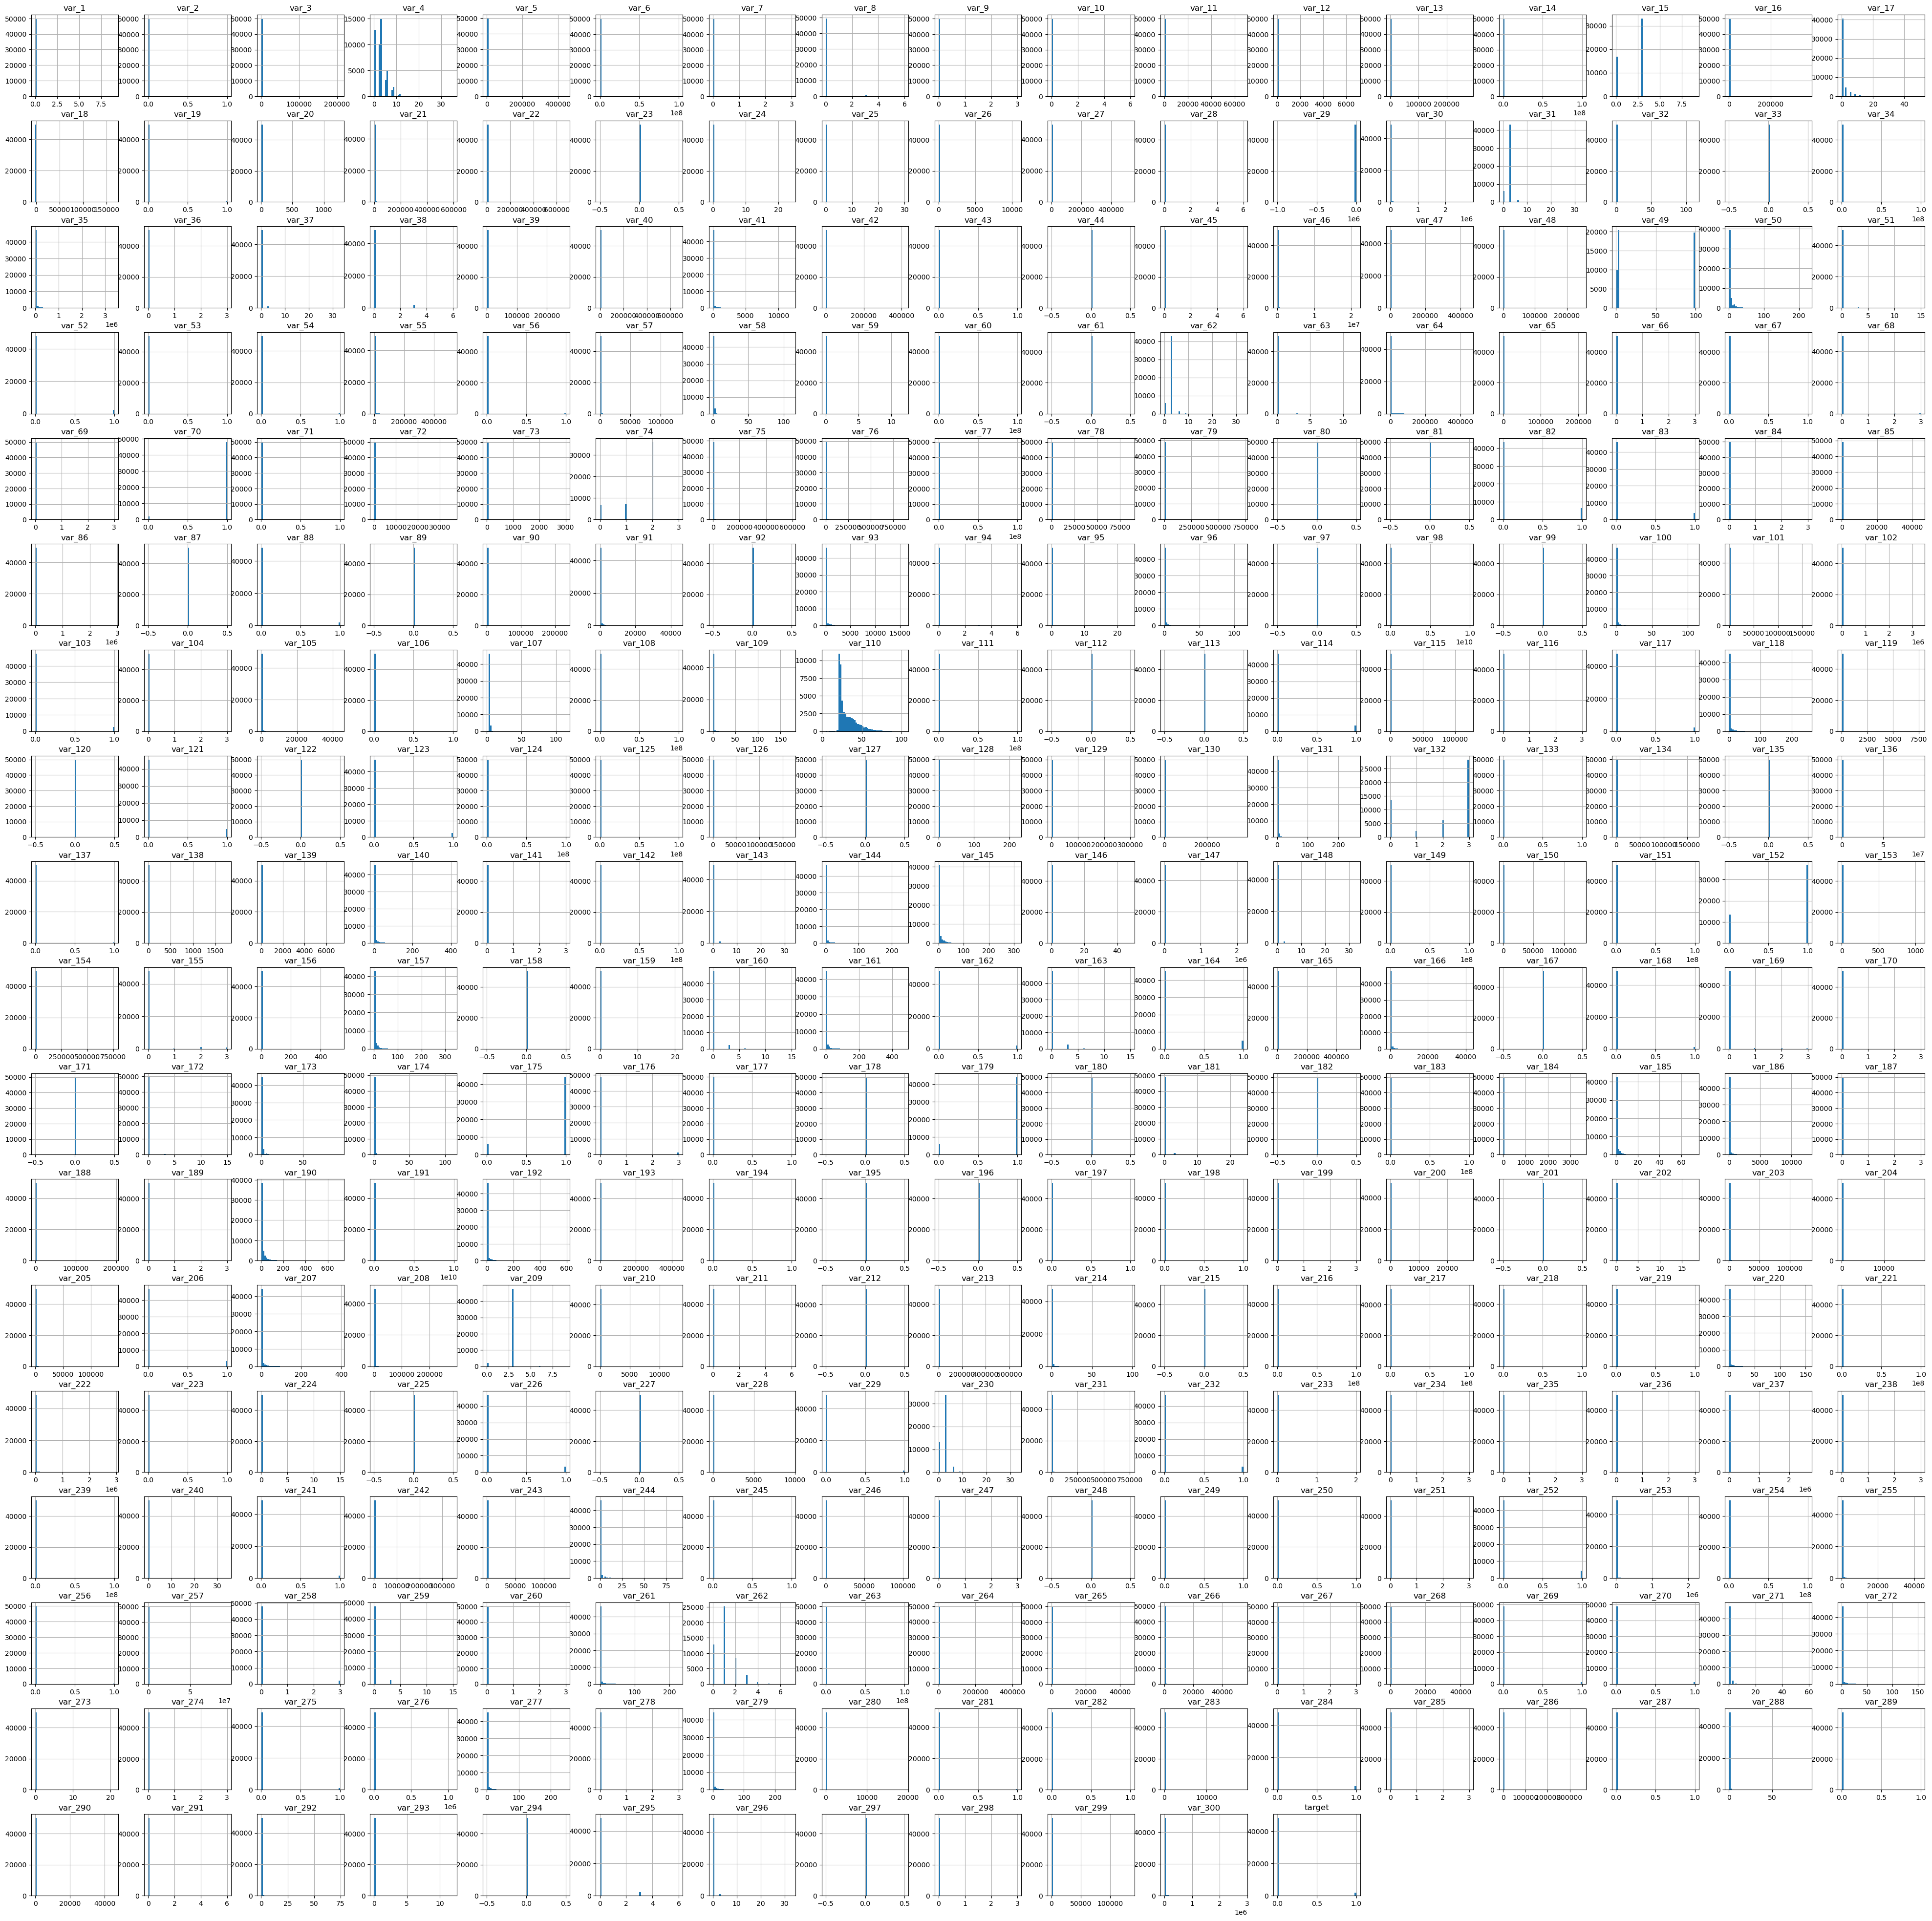

In [7]:
# histogram
# a lot of columns - rendering pretty long

df.hist(bins=50, figsize=(50, 50))

# 3. SPLITTING

In [8]:
# data on which we base
X = df.drop(columns=['target'])

# data which we predict
y = df['target']

In [9]:
# getting train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# getting test and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, stratify=y_test, test_size=0.3, random_state=42
)

In [10]:
# checking shapes of X's
print(X.shape, X_train.shape, X_test.shape, X_val.shape)

(50000, 300) (35000, 300) (10500, 300) (4500, 300)


In [11]:
# checking shapes of y's
print(y.shape, y_train.shape, y_test.shape, y_val.shape)

(50000,) (35000,) (10500,) (4500,)


# EXPORTING

In [12]:
# exporting data
relative_path = "./validation"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)

X_train.to_csv('validation/X_train_dataset_1.csv', encoding='utf-8')
X_test.to_csv('validation/X_test_dataset_1.csv', encoding='utf-8')
X_val.to_csv('validation/X_val_dataset_1.csv', encoding='utf-8')

y_train.to_csv('validation/y_train_dataset_1.csv', encoding='utf-8')
y_test.to_csv('validation/y_test_dataset_1.csv', encoding='utf-8')
y_val.to_csv('validation/y_val_dataset_1.csv', encoding='utf-8')

### in theory outliers, NAs handling and NAs replacing should be before features number reduction. Otherwise NAs replacing can produce type of columns that could have been handeled with features number reduction methods (which was already done). Alas, doing so would mean analysing 300 separeted histogram plots manually so as to determine whether column has outlier or not which is not impossible but undoubtadly needlessly hard. So we decided to reduce number of features first and then whilst having only few columns (~50) look for possible outliers through plots

# 4. FEATURES NUMBER REDUCTION

## 4.1. Duplicate features

In [13]:
# looking for duplicate features
duplicate_features = get_duplicate_features(X_train)

print(duplicate_features.shape)
duplicate_features.head()

(121, 3)


,Desc,feature1,feature2
0,Duplicate Values,var_43,var_106
1,Duplicate Values,var_14,var_129
2,Duplicate Values,var_14,var_158
3,Duplicate Values,var_14,var_167
4,Duplicate Values,var_14,var_171


In [14]:
# what are types of duplicates
duplicate_features['Desc'].unique()

array(['Duplicate Values', 'Duplicate Index'], dtype=object)

In [15]:
# flatten dataframe with duplicate features to list
duplicate_features = duplicate_features[duplicate_features['Desc'] == 'Duplicate Values']['feature2'].tolist()
print(duplicate_features)

['var_106', 'var_129', 'var_158', 'var_167', 'var_171', 'var_285', 'var_182', 'var_195', 'var_196', 'var_212', 'var_215', 'var_225', 'var_250', 'var_248', 'var_287', 'var_294', 'var_297', 'var_183', 'var_104', 'var_239', 'var_296', 'var_148', 'var_223', 'var_216', 'var_289', 'var_199', 'var_227', 'var_180', 'var_178', 'var_135', 'var_201', 'var_127', 'var_80', 'var_269', 'var_116', 'var_232', 'var_263', 'var_122', 'var_23', 'var_33', 'var_44', 'var_66', 'var_67', 'var_69', 'var_61', 'var_81', 'var_120', 'var_113', 'var_112', 'var_151', 'var_92', 'var_97', 'var_87', 'var_99']


In [16]:
# drop duplicate features and show difference
print('X_train shape before dropping duplicates: ', X_train.shape)
X_train.drop(columns = duplicate_features, inplace=True)
print('X_train shape after dropping duplicates: ', X_train.shape)

X_train shape before dropping duplicates:  (35000, 300)
X_train shape after dropping duplicates:  (35000, 246)


## 4.2. Constant features

In [17]:
# looking for constant features
constant_features = get_constant_features(X_train)

print(constant_features.shape)
constant_features.head()

(125, 4)


,Desc,Var,Value,Perc
0,Constant,var_14,0.0,100.000000
1,Constant,var_89,0.0,100.000000
2,Quasi Constant,var_170,0.0,99.997143
3,Quasi Constant,var_34,0.0,99.997143
4,Quasi Constant,var_234,0.0,99.997143


In [18]:
# what are types of constant features
constant_features['Desc'].unique()

array(['Constant', 'Quasi Constant'], dtype=object)

In [19]:
# flatten dataframe with constant columns to list
constant_features = constant_features[constant_features['Perc'] > 99]['Var'].tolist()
print(constant_features)

['var_14', 'var_89', 'var_170', 'var_34', 'var_234', 'var_243', 'var_247', 'var_124', 'var_73', 'var_2', 'var_133', 'var_280', 'var_283', 'var_36', 'var_72', 'var_65', 'var_150', 'var_111', 'var_153', 'var_187', 'var_189', 'var_210', 'var_217', 'var_141', 'var_228', 'var_10', 'var_28', 'var_6', 'var_12', 'var_233', 'var_11', 'var_7', 'var_265', 'var_9', 'var_71', 'var_20', 'var_267', 'var_146', 'var_221', 'var_257', 'var_59', 'var_90', 'var_126', 'var_149', 'var_204', 'var_274', 'var_136', 'var_1', 'var_3', 'var_202', 'var_138', 'var_264', 'var_95', 'var_184', 'var_235', 'var_60', 'var_42', 'var_290', 'var_142', 'var_237', 'var_77', 'var_299', 'var_45', 'var_53', 'var_78', 'var_254', 'var_260', 'var_219', 'var_211', 'var_43', 'var_224', 'var_246', 'var_197', 'var_32', 'var_24', 'var_102', 'var_48', 'var_125', 'var_115', 'var_98', 'var_282', 'var_159', 'var_39', 'var_286', 'var_298', 'var_245', 'var_40', 'var_236', 'var_249', 'var_16', 'var_130', 'var_56', 'var_291', 'var_251', 'var_194

In [20]:
# drop constant features and show difference
print('X_train shape before dropping constant features: ', X_train.shape)
X_train.drop(columns = constant_features, inplace=True)
print('X_train shape after dropping constant features: ', X_train.shape)

X_train shape before dropping constant features:  (35000, 246)
X_train shape after dropping constant features:  (35000, 121)


## 4.3. Correlated features

In [21]:
# getting correlation matrix
corr = X_train.corr(method="spearman").abs()

# getting only values above main diagonal, since correlation matrix is symmetric
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [22]:
# looking for highly correlated features
corr_features = []
for col in upper_triangle:
    if any(upper_triangle[col] < 0.001) or any(upper_triangle[col] > 0.95):
        corr_features.append(col)
        
corr_features = pd.Series(corr_features)

print(corr_features.shape)
corr_features.head()

(73,)


0    var_31
1    var_37
2    var_51
3    var_52
4    var_54
dtype: object

In [23]:
# drop highly correlated features and show difference
print('X_train shape before dropping highly correlated features: ', X_train.shape)
X_train.drop(columns = corr_features, inplace=True)
print('X_train shape after dropping highly correlated features: ', X_train.shape)

X_train shape before dropping highly correlated features:  (35000, 121)
X_train shape after dropping highly correlated features:  (35000, 48)


# 5. TRANSFORMATIONS

## 5.1. Outliers

array([[<AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_8'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_17'}>,
        <AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_19'}>,
        <AxesSubplot:title={'center':'var_21'}>],
       [<AxesSubplot:title={'center':'var_29'}>,
        <AxesSubplot:title={'center':'var_30'}>,
        <AxesSubplot:title={'center':'var_35'}>,
        <AxesSubplot:title={'center':'var_38'}>,
        <AxesSubplot:title={'center':'var_41'}>,
        <AxesSubplot:title={'center':'var_46'}>,
        <AxesSubplot:title={'center':'var_47'}>],
       [<AxesSubplot:title={'center':'var_49'}>,
        <AxesSubplot:title={'center':'var_50'}>,
        <AxesSubplot:title={'center':'var_57'}>,
        <AxesSubplot:title={'center':'var_70'}>,
        <AxesSubplot:title={'center':'var_74'}>,
        <AxesSubplot:title={'center':'var_75'}>,
        <AxesSubplot

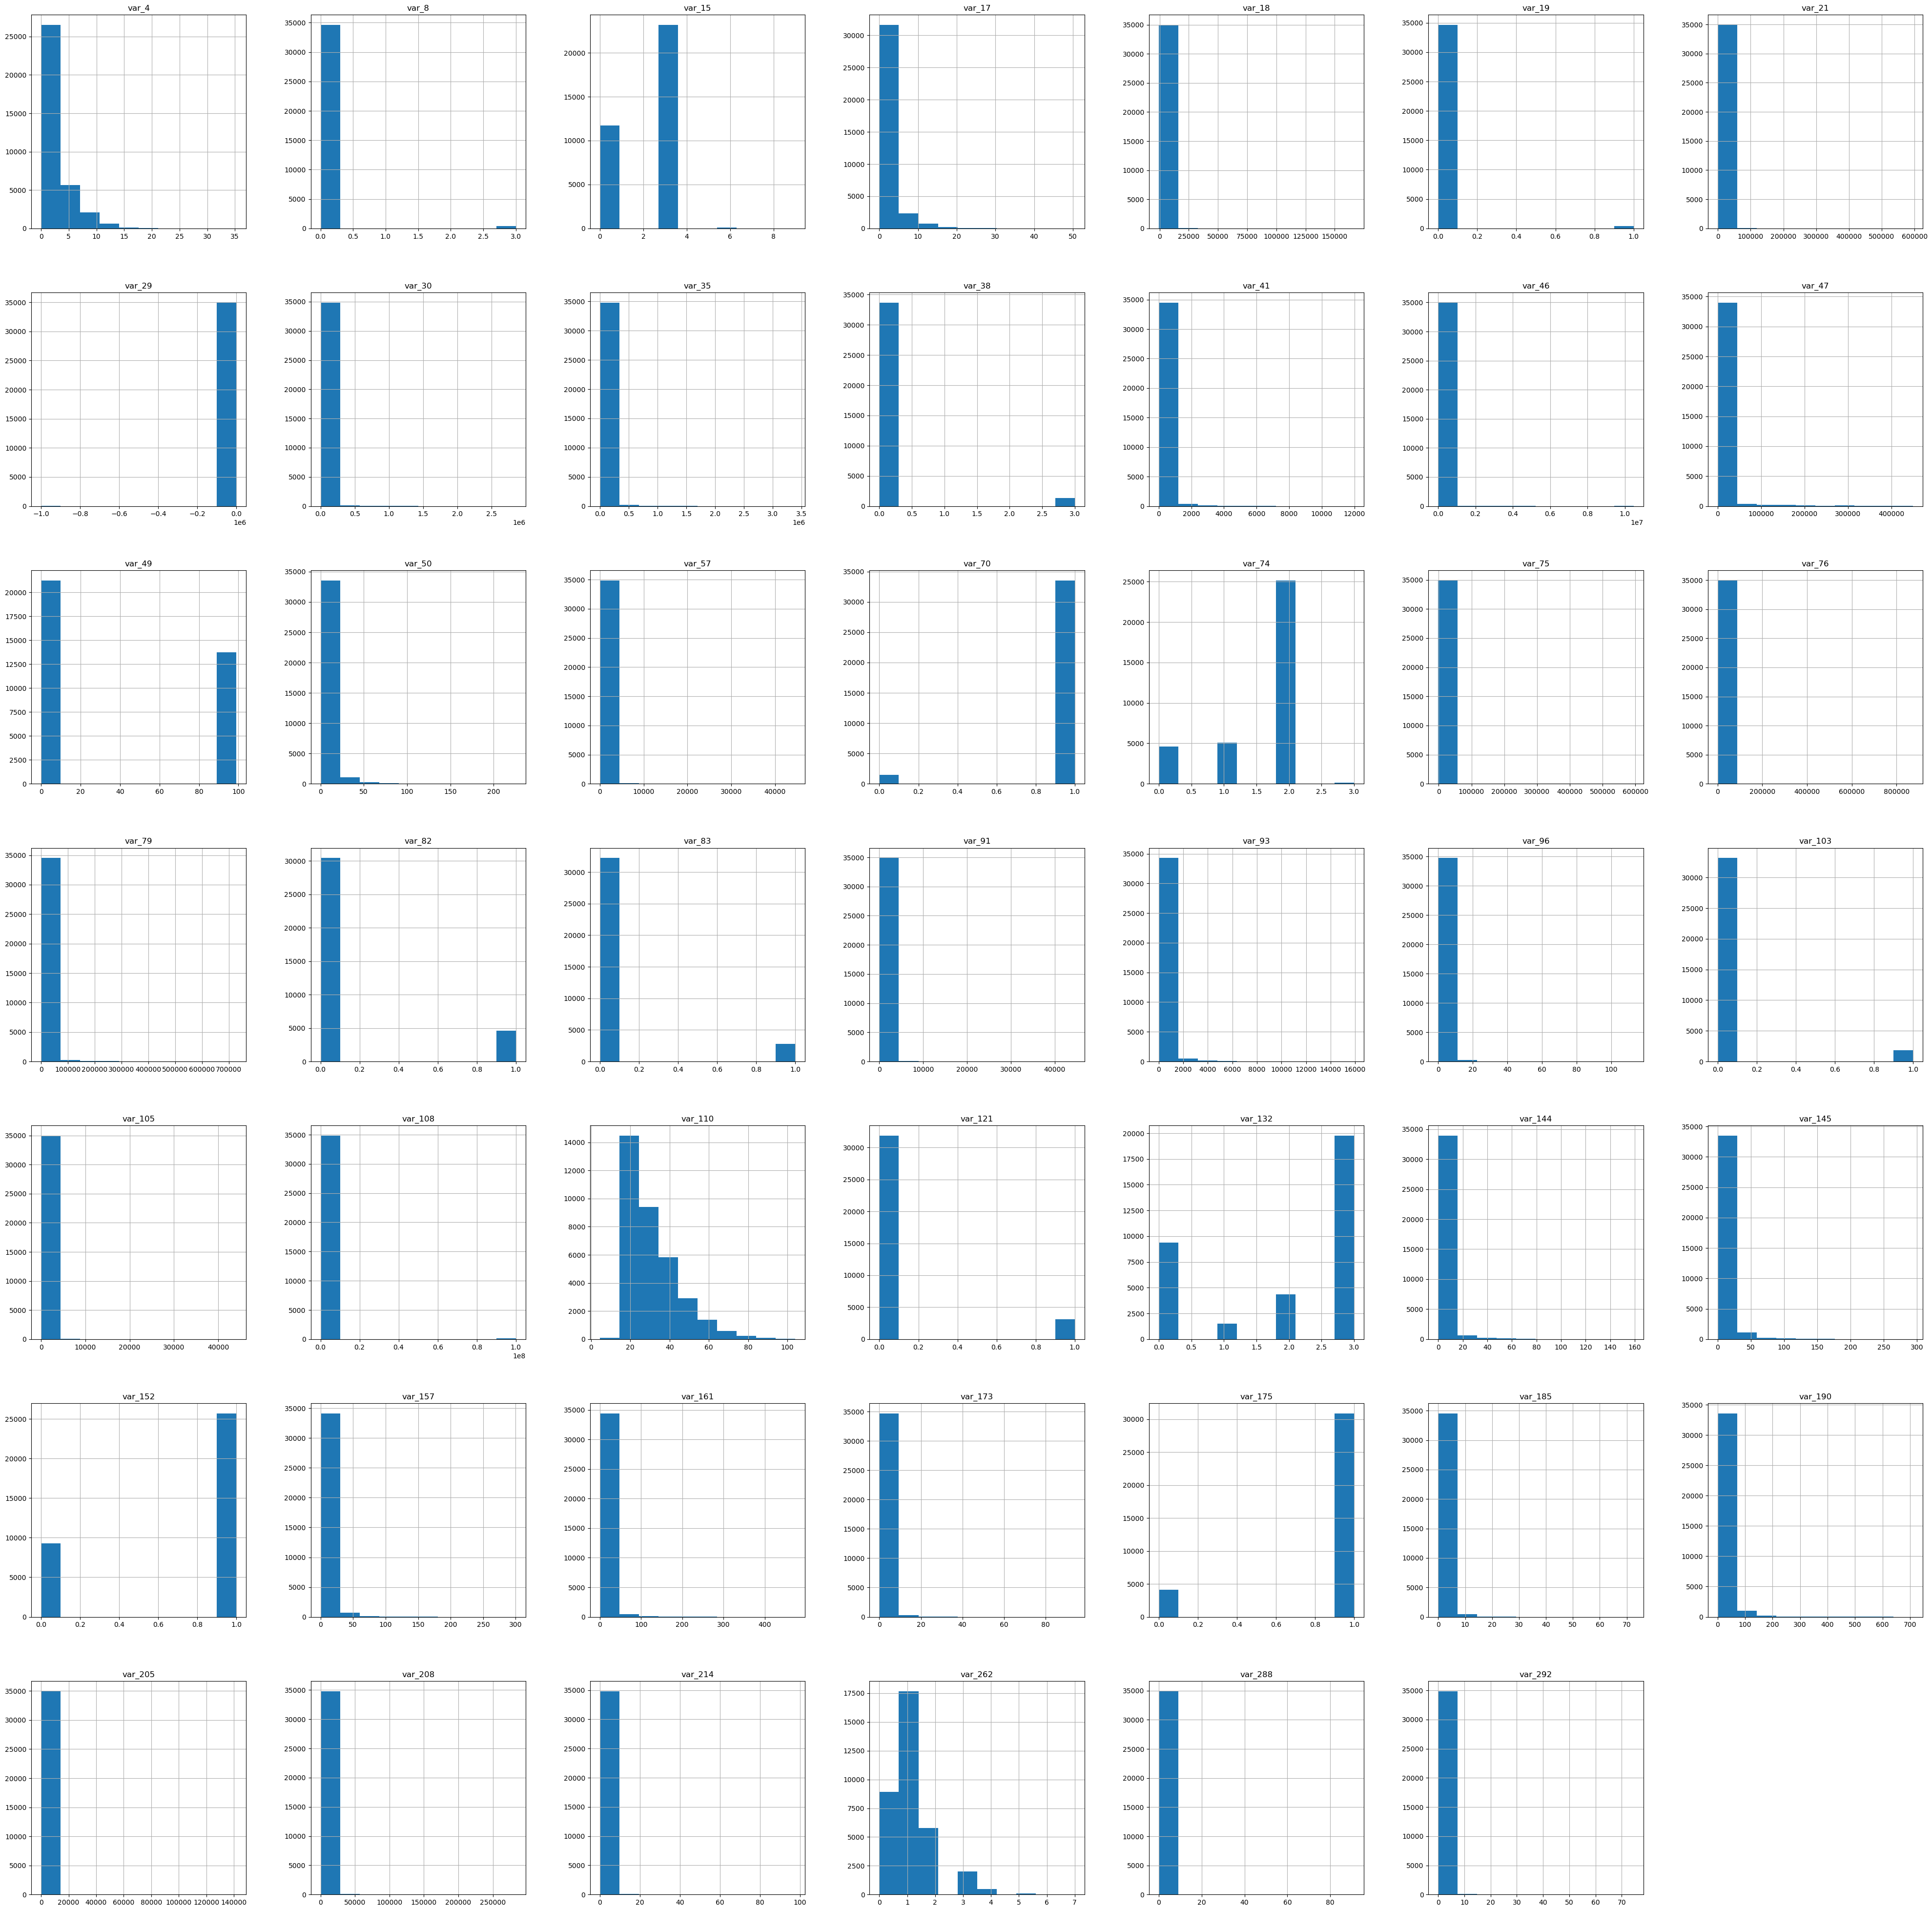

In [24]:
# take a look at dataframe so to find outliers
X_train.hist(figsize=(50, 50))

In [25]:
# we assume that these columns contain outliers
outliers = [  'var_8',  'var_17',  'var_18',  'var_19',  'var_21',
             'var_29',  'var_30',  'var_35',  'var_38',  'var_41', 'var_46', 'var_47',
             'var_50',  'var_57',  'var_70',  'var_75',  'var_76',
             'var_79',  'var_82',  'var_83',  'var_91',  'var_93', 'var_96', 'var_103',
            'var_105', 'var_108', 'var_121', 'var_144', 'var_145',
            'var_157', 'var_161', 'var_173', 'var_175', 'var_185', 'var_190',
            'var_205', 'var_208', 'var_214', 'var_288', 'var_292']

# check 95% quantile
X_train[outliers].quantile(0.95)

var_8           0.000000
var_17          8.190000
var_18          0.000000
var_19          0.000000
var_21       2775.230640
var_29          2.000000
var_30          0.000000
var_35      86400.000000
var_38          0.000000
var_41        409.392600
var_46     230783.498340
var_47          0.000000
var_50         19.950000
var_57        496.800000
var_70          1.000000
var_75       2760.000000
var_76        979.283730
var_79          0.000000
var_82          1.000000
var_83          1.000000
var_91        826.877385
var_93        686.441250
var_96          2.850000
var_103         1.000000
var_105       261.900000
var_108         0.000000
var_121         1.000000
var_144         8.730000
var_145        26.460000
var_157        19.530000
var_161        22.080000
var_173         2.970000
var_175         1.000000
var_185         3.000000
var_190        62.704500
var_205         0.000000
var_208         0.000000
var_214         0.000000
var_288         0.000000
var_292         0.000000


In [26]:
# replace outliers with NAs
for outlier in outliers:
    col = X_train[outlier]
    X_train[outlier] = np.where(col < col.quantile(0.95), col, float('nan'))

## 5.2. Handling NAs and/or Nulls

In [27]:
# replace NAs with median
for column in X_train.columns:
    X_train[column].fillna(X_train[column].median(), inplace=True)

## 5.3. Normalization or standarization

In [28]:
for column_idx in X_train.columns:
    col = X_train[column_idx]
    X_train[column_idx] = (col - col.min()) / (col.max() - col.min())

## 5.4. Replacing NAs and/or Nulls

In [29]:
# column can be empty in case all of its values were greater or equal to 97% quantile so all of them turned into NAs
# because of this median is also NA, thus column remains empty
empty = [column for column in X_train.columns if all(X_train[column].isna())]

# remove all empty columns as they do not influence on prediction
X_train.drop(columns=empty, inplace=True)

# 6. SUMMARY

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 13889 to 47738
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   var_4    35000 non-null  float64
 1   var_15   35000 non-null  float64
 2   var_17   35000 non-null  float64
 3   var_18   35000 non-null  float64
 4   var_21   35000 non-null  float64
 5   var_29   35000 non-null  float64
 6   var_35   35000 non-null  float64
 7   var_41   35000 non-null  float64
 8   var_46   35000 non-null  float64
 9   var_49   35000 non-null  float64
 10  var_50   35000 non-null  float64
 11  var_57   35000 non-null  float64
 12  var_74   35000 non-null  float64
 13  var_75   35000 non-null  float64
 14  var_76   35000 non-null  float64
 15  var_91   35000 non-null  float64
 16  var_93   35000 non-null  float64
 17  var_96   35000 non-null  float64
 18  var_105  35000 non-null  float64
 19  var_108  35000 non-null  float64
 20  var_110  35000 non-null  float64
 21  var_132 

array([[<AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_17'}>,
        <AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_21'}>,
        <AxesSubplot:title={'center':'var_29'}>],
       [<AxesSubplot:title={'center':'var_35'}>,
        <AxesSubplot:title={'center':'var_41'}>,
        <AxesSubplot:title={'center':'var_46'}>,
        <AxesSubplot:title={'center':'var_49'}>,
        <AxesSubplot:title={'center':'var_50'}>,
        <AxesSubplot:title={'center':'var_57'}>],
       [<AxesSubplot:title={'center':'var_74'}>,
        <AxesSubplot:title={'center':'var_75'}>,
        <AxesSubplot:title={'center':'var_76'}>,
        <AxesSubplot:title={'center':'var_91'}>,
        <AxesSubplot:title={'center':'var_93'}>,
        <AxesSubplot:title={'center':'var_96'}>],
       [<AxesSubplot:title={'center':'var_105'}>,
        <AxesSubplot:title={'center':'var_108'}>,
        <AxesSub

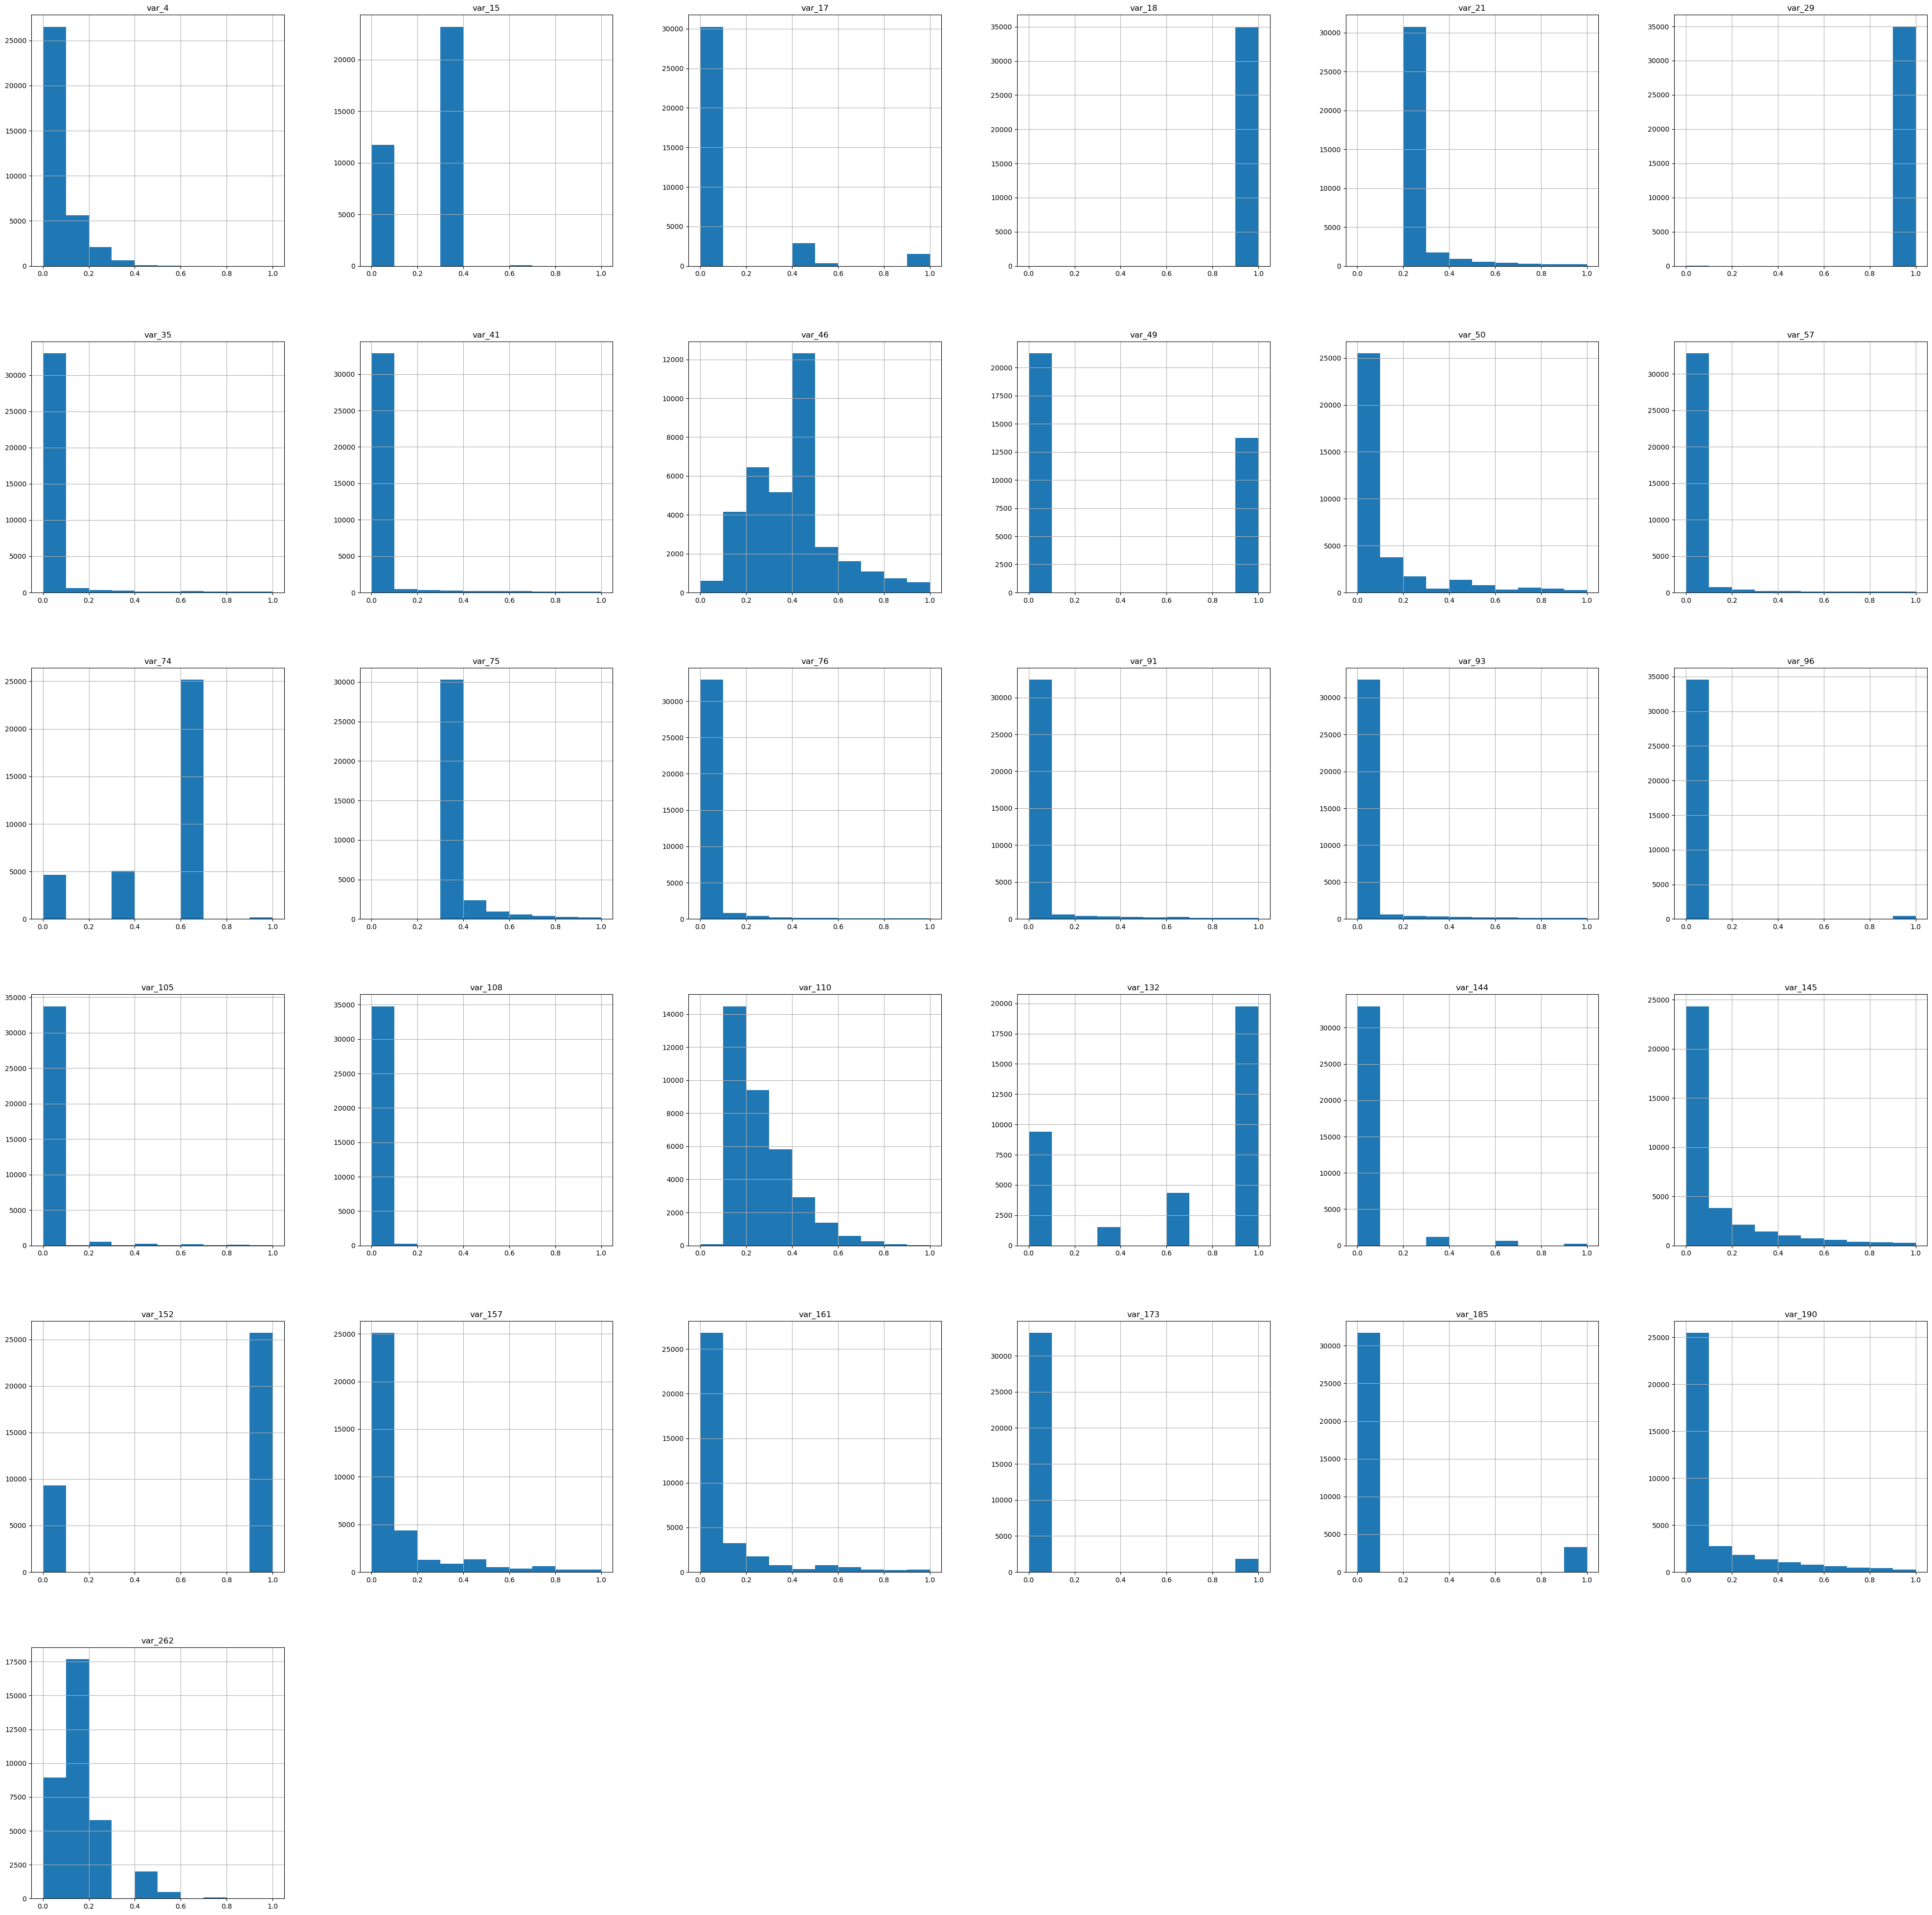

In [31]:
X_train.hist(figsize=(50, 50))

<AxesSubplot:>

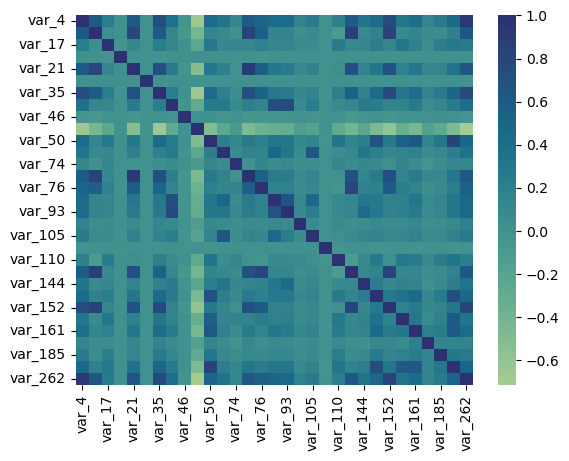

In [32]:
mc = X_train.corr(method="spearman")
sb.heatmap(mc, cmap="crest")

# EXPORTING

In [33]:
# exporting preprocessed dataset to csv
relative_path = "./preprocessed"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)
    
X_train.to_csv('preprocessed/train_dataset_1.csv', encoding='utf-8')